# Social Computing/Social Gaming - Summer 2023
# Exercise Sheet 1 - Introduction to Python and Network Visualization
Welcome to the 2023 Social Computing / Social Gaming tutorial assignments. For all exercise sheets Python is the programming language of choice. This exercise sheet will therefore provide an introduction to Python for you. In the latter part of this exercise sheet you will take on your first Social Computing task.

In addition to the iPython notebooks, it is recommended to have a look at the introduction videos and/or the introduction slides, both provided on Moodle, for every exercise sheet as they contain **helpful hints** and the **form of the assignment** which is **mandatory**!

## Task 1.1: Sparse Vector Representation
To get you prepared for using Python in the upcoming exercise sheets we will introduce some of Python's most important features on the example of sparse vectors. The basic idea is that sparse vectors (vectors whose positions are mostly zero) can be represented more efficiently by only saving a list of tuples containing the valueable data's position and its data. For example (0,0,0,4,0,0,42) would be represented by [(3,4),(6,42)].

In [1]:
ExampleVector1 = [0, 0, 0, 4, 0, 0, 42]
ExampleVector2 = [0, 10, 0, 0, 0, 0, 8, 0, 0, 15]


**a)** As the first step, **complete** the ``sparseVectorTransform()`` function so that it transforms the given vector to a list of tuples as stated in the example above. Create reasonable ``ExampleVectors`` in the block above to test your function.

**Hint:** You can use ``enumerate()`` in a for-loop. You can also use print(type(variable)) if u want to know the type.

In [2]:
def sparseVectorTransform(vector):
    sparse_data = []
    for i, value in enumerate(vector):
        if value != 0:
            sparse_data.append((i, value))
    return sparse_data

**b)** In Python variables are not assigned to a fixed datatype in contrast to Java for example. Resulting from this, lists for example can contain different datatypes for its element even a function can be stored in a variable or list!
Below you can see ``combineSVs()`` which combines two of our sparse vectors in tupel representation into one by only considering positions that are set in both vectors. The data entries for the respective position are combined with use of the handed over function. As you can see the function is handed over just like regular parameters in Python.

In [3]:
def combineSVs(func:callable,SV1:list,SV2:list)-> list:
    returnlist = []
    for element1 in SV1:
        for element2 in SV2:
            if element1[0] == element2[0]: returnlist.append( (element1[0], func(element1[1],element2[1])))
    return returnlist

It is now your task to **define** such a combining function to hand over to the `combineSVs()`. As we will only know at runtime what datatypes are contained in the vector, this function first needs to check which datatypes the given parameters have. For this task we will allow the vectors to contain Integers, Strings and Functions.
Depending on datatypes, the result for their combination should be:
- Integer & Integer => Add both Integers
- String & String => Concatenate both String sequences
- String & Integer => Add the Integer as character at the end of the String
- Integer & String => Multiply the String sequence by Integer.
- Function & (String||Integer) => The result of the Function with the String or Integer as its parameter

**Hint:** https://docs.python.org/3/library/functions.html#isinstance
https://docs.python.org/3/library/functions.html#callable


In [4]:
def combineElements (element1,element2):
    if isinstance(element1, int) and isinstance(element2, int):
        return element1 + element2
    elif isinstance(element1, str) and isinstance(element2, str):
        return element1 + element2
    elif isinstance(element1, str) and isinstance(element2, int):
        return element1 + str(element2)
    elif isinstance(element1, int) and isinstance(element2, str):
        return element2 * element1
    elif callable(element1) and (isinstance(element2, int) or isinstance(element2, str)):
        return element1(element2)
    
    
    #If the elements' datatypes do not fit any of our combination this exception will be thrown
    raise TypeError("Zulässige Kombinationen der Datentypen nicht eingehalten!")

**c)** The vectors below contain all possible combinations specified above. Use them to **compute** your final combined sparse vector in tuple representation. Then shortly **explain** in your own words the chances and pitfalls of Python's datatype independent variables. Three sentences will be sufficient.

In [5]:
v1 = (1,2,'Hallo Welt',len)
v2 = (3,'Hello world',4,'123')
print(combineSVs(combineElements, sparseVectorTransform(v1), sparseVectorTransform((v2))))

[(0, 4), (1, 'Hello worldHello world'), (2, 'Hallo Welt4'), (3, 3)]


As example (0,0,0,4,0,0,42) and (0,0,0,4,0,0,42) with print(combineSVs(combineElements, sparseVectorTransform((0,0,0,4,0,0,42)), sparseVectorTransform(((0,0,0,4,0,0,42))))) results in: [(3, 8), (6, 84)]



**TODO: Write your explanation here:**
Python's datatype independent variables allow flexibility in storing and manipulating different types of data within the same container like lists. This flexibility enables dynamic programming and accommodates diverse scenarios where data types may vary. However, it also introduces the risk of unexpected behavior or errors if data types are not handled appropriately. Also, the code's readability can be affected badly when dealing with variables that can hold different data types.

## Task 1.2: Twitch Social Network with NetworkX

For your second task you will now take your first steps into Social Computing / Social Gaming. We will therefore have a look at German streamers from [Twitch](https://www.twitch.tv/) [1]. Twitch is an international platform for live-streaming games or other content. The data set [2] has been created in 2019 and contains lots of information about different streamers. 
For our tasks we will only consider the German Twitch-streamers. Twitch offers lots of functionalities including a friendship system. The task is to draw a graph representing the **friendship network** of the hundred most watched German streamers.

In [6]:
#Import the required libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

**Read** in the data set by using the **Pandas** library [3]. For a quick overview, you can refer to [4]. Pandas provides a powerful data structure called the ''DataFrame'' which is widely used in data science and machine learning. For your exercise sheets it will always come in handy to have a look at the used package's **documentations** online!

**Inspect** the three dataframes to fully understand what they contain. Don't confuse the Twitch IDs (``id``) with the node's IDs for our data set (``new_id``), which will form the key for our dataset.

**Hint:** You can have a look at the first entries of your Pandas data-frames with `Dataframe.head(10)`.

In [7]:
#Contains a multitude of information about the streamers (adressed by their Twitch IDs).
nodes_DF = pd.read_csv('musae_DE_target.csv')
#Contains the friendship relations between streamers.
edges_DF = pd.read_csv('musae_DE_edges.csv')
#Contains the names of the top 100 Twitch-streamer for their Twitch IDs.
twitchNames_DF = pd.read_csv('TwitchIDList.csv')

**a)** First, we will deal with our graph's nodes, the streamers. 
We are only interested in streamers who have been streaming for more than 2000 days. **Filter** the data to contain only such rows.
There are some columns we will not need later. **Remove** the unnecessary information by **dropping** the `id`, ``days`` and ``mature`` columns from ``nodes_DF``. 
Then, to limit our data on the 100 most viewed streamers **order** ``nodes_DF`` by ``views`` and only **keep** the first 100 entries as ``orderedNodes_DF``.

In [8]:
#print(nodes_DF)
#removed day filter because of bug
#filtered_nodes_DF = nodes_DF[nodes_DF['days'] > 2000]
#print(filtered_nodes_DF)
filtered_nodes_DF = nodes_DF.drop(['id', 'days', 'mature'], axis=1)
#print(filtered_nodes_DF)
orderedNodes_DF = filtered_nodes_DF.sort_values(by='views', ascending=False).head(50)
#print(orderedNodes_DF)


**b)** Now we need to work on the friendship data-frame, our graph's edges. As we will only draw the top 100 streamers as nodes, we are only interested in friendship relations in between these 100 nodes. The relations are represented as "from"->"to" even though the friendship relation is considered undirected.

**Fill** the list  ``drop_indices`` with all entry's indices that have their target outside of our 100 nodes. Therefore go through all entries of `edges_DF` and check if their ``to`` value is contained in ``nodesList``.
Then **drop** all the respective entries from our data-frame.

**Hint:** We do not need to worry about the ``from`` values as our merging process will take care of that part in the next task.

In [9]:
drop_indices = []
nodesList = orderedNodes_DF['new_id'].tolist()
#print(edges_DF)

for index, row in edges_DF.iterrows():
    if row['to'] not in nodesList:
        drop_indices.append(index)

filtered_edges_DF = edges_DF.drop(drop_indices)
#print(filtered_edges_DF)


**c)** For the next step, we now have to **merge** our dataframes. This works similar to a SQL Join operation. We want to use an **'inner' merge** (similar to an "inner"=="normal" join in SQL) and make sure the nodes ID matches the friendship relation's origin. Thus it will only consider any friendships of our 100 nodes.


SQL-join:
https://www.w3schools.com/sql/sql_join.asp

In [10]:
merged_DF = pd.merge(orderedNodes_DF, filtered_edges_DF, left_on='new_id', right_on='from', how='inner')
#print(merged_DF)

Now networkX [5] **reads** all the edges from our dataframe and creates a Graph object. **Take a look** at the number of nodes in your graph. **Explain** your observations shortly.

In [11]:
graph = nx.from_pandas_edgelist(merged_DF, "new_id", "to")

num_nodes = graph.number_of_nodes()

print("Number of nodes:", num_nodes)

Number of nodes: 47


Some nodes don't have relation with eachother. 

**d)** Before we finally draw our graph, lets add some **additional information** to it. We want to represent if the respective streamer is an official Twitch-partner by the **color** of a node.  The ``partner`` column in our dataframe will provide you with the partner-status. 

All entries were represented by their ID until now. To make our graph readable we want to name all nodes with the streamers' actual names that are contained in ``twitchNames_DF``. You have now to **create two dictionaries** that map the nodes ID to its partner state and streamer's name.

Thereafter the given code will create the colormap from your dictionary, that will later be used to apply the colors to our graph. Then the graph object is created.

**Hint:** As ``twitchNames_DF`` only contains the most 100 viewed streamer's names you can use it as an indicator whether you have solved everything correctly.

In [14]:

partnerState_dict = dict(zip(merged_DF['new_id'], merged_DF['partner']))
twitchNames_dict = dict(zip(twitchNames_DF['new_id'], twitchNames_DF['TwitchName']))

colormap = []
for node in graph:
    if(node in partnerState_dict and partnerState_dict[node] == True):
        colormap.append('Purple')
    else:
        colormap.append('Blue')

graph = nx.relabel_nodes(graph, twitchNames_dict)

**e)** Now to conclude your first exercise sheet you can finally draw the graph. NetworkX offers you multiple pre-defined **[graph layouts](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)** [6] that you can use. Don't forget to make use of the ``colormap`` and the set options! Matplotlib will then print your graph.

**Try** out the different layouts and chose two that fit the graph well. Then **explain** why they fit well and what **observations** you could draw from our visualized network shortly!

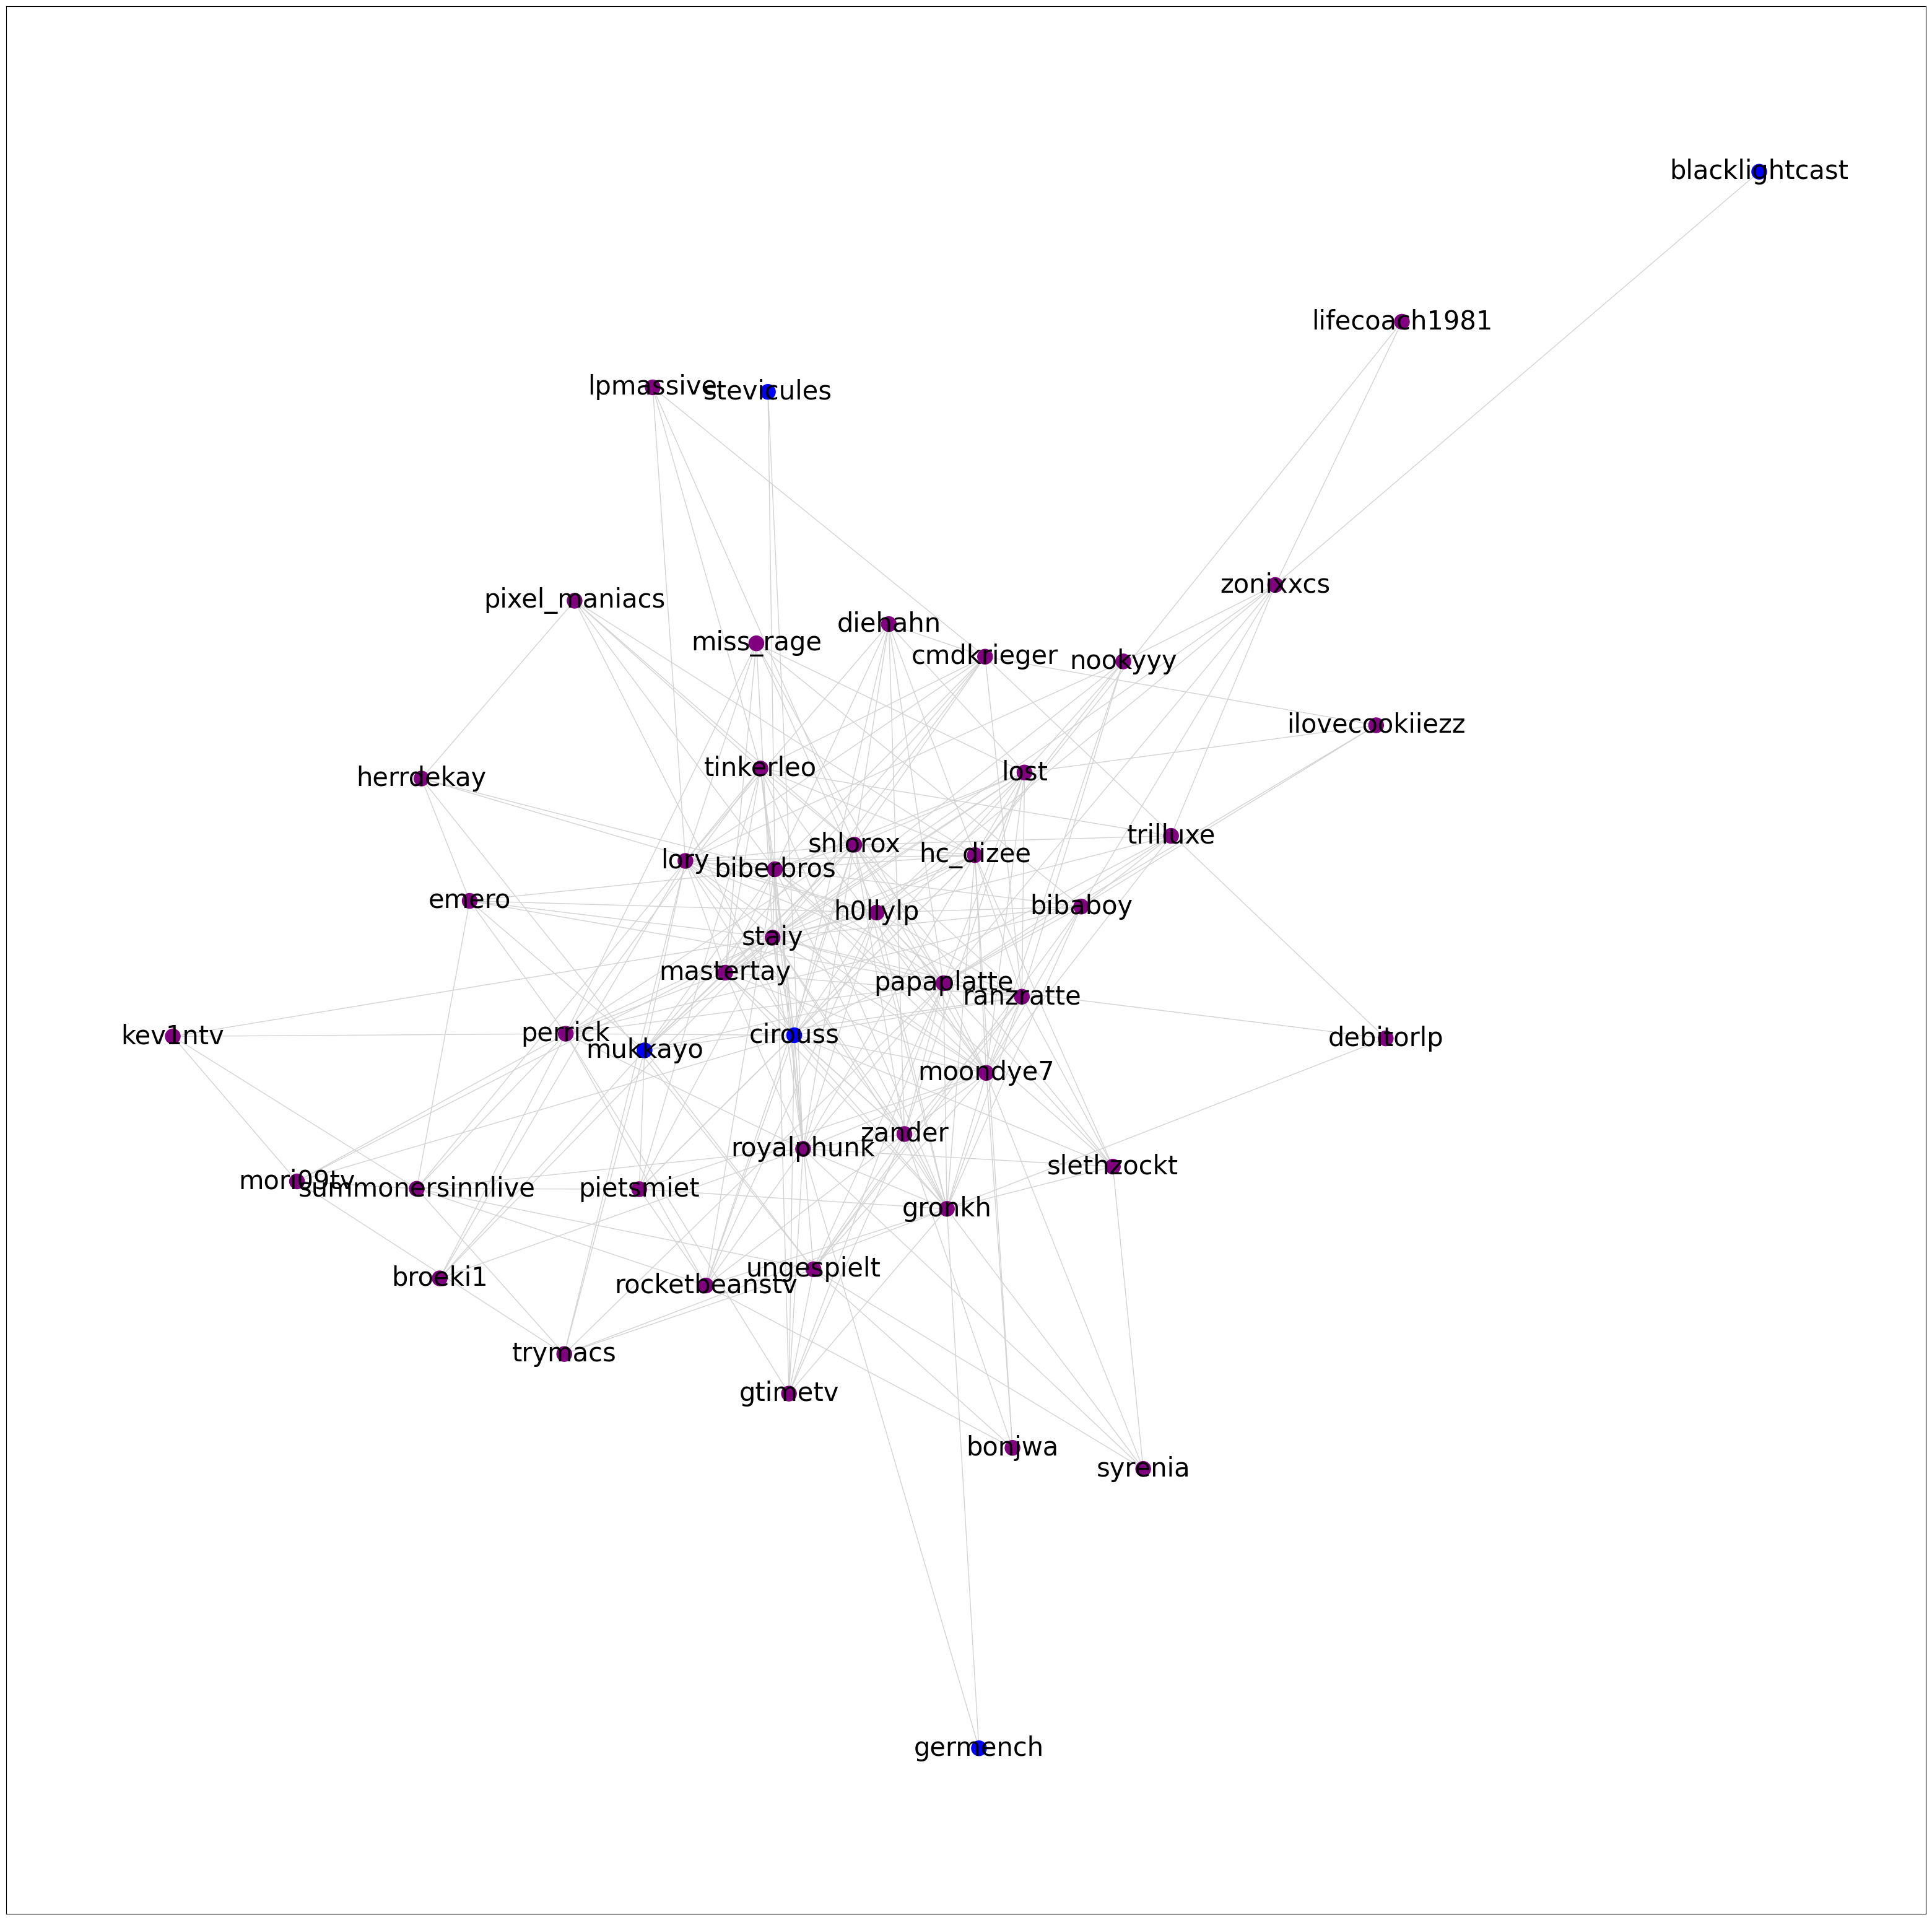

In [13]:
plt.figure(1,figsize=(40,40)) 
options = {
    "font_size" : 30,
    "edge_color": 'lightGrey'
    }

#TODO: Draw the network. Hint: Use the draw_networkx method instead of draw.
#nx.draw_networkx(graph, pos=nx.circular_layout(graph), node_color=colormap, **options)

nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_color=colormap, **options)


plt.show()

**TODO: Write your explanation and observations here:**
Spring layout is well-suited for visualizing this network because it arranges nodes based on their edge connections, providing a clear representation of centrality.

## References

<br>[1] https://www.twitch.tv/
<br>[2] Rozemberczki, B., Allen, C. & Sarkar, R. (2019). *Multi-scale Attributed Node Embedding*
<br>[3] https://pandas.pydata.org/docs/getting_started/index.html
<br>[4] https://pandas.pydata.org/docs/user_guide/10min.html
<br>[5] https://networkx.org/documentation/stable/reference/index.html
<br>[6] https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout